In [1]:
import fastai
import torch

In [2]:
from fastai.vision import *
import torch.nn.functional as F
from fastai.layers import *

In [29]:
transforms = get_transforms(do_flip=False, max_rotate=5.0, max_zoom=1.0,
    max_warp=0.0) # Todo look at these
DATA_PATH = "C:/Code/Senior Project"
#  bs=32, size=224 ds_tfms=transforms label_delim=' '
data = ImageItemList.from_csv(DATA_PATH, "labels.csv")
                              # ds_tfms=transforms, num_workers=0, bs=32, size=224, csv_labels="labels.csv")

In [30]:
# data = data.random_split_by_pct()

data = (data.random_split_by_pct()
            .label_from_df(cols=["throttle", "direction"],  label_cls=FloatList)
            .transform(transforms, size=224)
            .databunch())

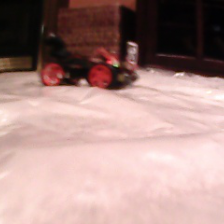

In [49]:
val_ds = data.valid_ds
img, label = val_ds[2]
img

In [32]:
reg_head = torch.nn.Sequential(Flatten(), torch.nn.Linear(25088, 2))
learn = create_cnn(data, models.resnet18, metrics=[], custom_head=reg_head, loss_func=F.mse_loss)

In [33]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList
y: FloatList (2981 items)
[FloatItem [0.9 0. ], FloatItem [0.9 0. ], FloatItem [0.9 0. ], FloatItem [0.9 0. ], FloatItem [0.9 0. ]]...
Path: C:\Code\Senior Project
x: ImageItemList (2981 items)
[Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320)]...
Path: C:\Code\Senior Project;

Valid: LabelList
y: FloatList (745 items)
[FloatItem [ 0.8 -1. ], FloatItem [ 0.8 -1. ], FloatItem [0.7 0. ], FloatItem [0. 0.], FloatItem [0.9 0. ]]...
Path: C:\Code\Senior Project
x: ImageItemList (745 items)
[Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320), Image (3, 240, 320)]...
Path: C:\Code\Senior Project;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


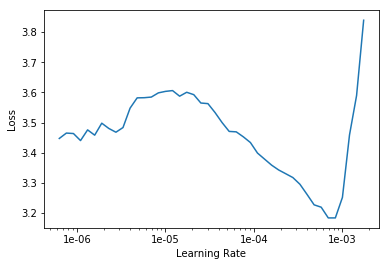

In [35]:
learn.recorder.plot()

In [36]:
epochs = 3
lr = 5e-3 # chosen using lr plot 
learn.fit_one_cycle(epochs, lr)

epoch,train_loss,valid_loss
1,21.663774,14.732138
2,12.149896,1.847864
3,5.237029,1.005579


In [53]:
learn.predict(img)

(FloatItem [1.343108 1.096175],
 tensor([1.3431, 1.0962]),
 tensor([1.3431, 1.0962]))

In [50]:
print(label)

[0.7 0. ]
